In [199]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [200]:
import pandas as pd
import numpy as np 

In [201]:
ab = pd.read_csv('.\\abalone.csv')

Data Source [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Car+Evaluation)

In [202]:
ab.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [203]:
ab.Sex = ab.Sex.map({'M': 3, 'F': 2, 'I': 1})
ab.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,3,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,3,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [204]:
ab[pd.isnull(ab).any(axis=1)]

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings


In [205]:
print("Correlations")
for col in ab.columns[1:]:
    print(f"Sex — {col}".ljust(20), np.corrcoef(ab.Sex, ab[col])[0, 1])

Correlations
Sex — Length         0.4487652960384108
Sex — Diameter       0.4582451214805328
Sex — Height         0.41792784168831915
Sex — WholeWeight    0.4612383803307352
Sex — ShuckedWeight  0.44092689147162856
Sex — VisceraWeight  0.454657676545619
Sex — ShellWeight    0.44554919696009265
Sex — Rings          0.3518215878725028


In [206]:
y = ab.Sex.copy()
X = ab.drop('Sex', axis=1)

In [207]:
from sklearn.model_selection import train_test_split

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=257)

In [209]:
from sklearn import metrics

In [210]:
def fit_and_predict(fit):
    y_predict = fit(X_train, y_train).predict(X_test)
    a = metrics.accuracy_score(y_test, y_predict)
    p = metrics.precision_score(y_test, y_predict, average='weighted')
    r = metrics.recall_score(y_test, y_predict, average='weighted')
    f1 = metrics.f1_score(y_test, y_predict, average='weighted')
    print(pd.DataFrame({'Score':['Accuracy', 'Precision', 'Recall', 'F1'], 'Result':[a, p, r, f1]}))
    print('-'*53)
    print(' '*16 + 'Classification Report')
    print('-'*53)
    print(metrics.classification_report(y_test, y_predict, labels=[3, 2, 1], target_names=['M', 'F', 'I']))
    return [a, p, r, f1]

In [211]:
plot_data = list()

# Logistic Regression

In [212]:
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier

In [213]:
lr = LogisticRegression(max_iter=220)
plot_data.append({'LogisticRegression': fit_and_predict(lr.fit)})

       Score    Result
0   Accuracy  0.545455
1  Precision  0.536165
2     Recall  0.545455
3         F1  0.533103
-----------------------------------------------------
                Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           M       0.46      0.54      0.49       228
           F       0.46      0.29      0.35       178
           I       0.68      0.76      0.72       221

    accuracy                           0.55       627
   macro avg       0.53      0.53      0.52       627
weighted avg       0.54      0.55      0.53       627



# Perceptron

In [214]:
perc = Perceptron()
plot_data.append({'Perceptron': fit_and_predict(perc.fit)})

       Score    Result
0   Accuracy  0.535885
1  Precision  0.462948
2     Recall  0.535885
3         F1  0.457437
-----------------------------------------------------
                Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           M       0.44      0.92      0.59       228
           F       0.00      0.00      0.00       178
           I       0.86      0.57      0.69       221

    accuracy                           0.54       627
   macro avg       0.43      0.50      0.43       627
weighted avg       0.46      0.54      0.46       627



# Stochastic Gradient Descent

In [215]:
sgd = SGDClassifier()
plot_data.append({'StochasticGradientDescent': fit_and_predict(sgd.fit)})

       Score    Result
0   Accuracy  0.526316
1  Precision  0.498806
2     Recall  0.526316
3         F1  0.421397
-----------------------------------------------------
                Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           M       0.43      0.01      0.03       228
           F       0.44      0.79      0.57       178
           I       0.62      0.84      0.71       221

    accuracy                           0.53       627
   macro avg       0.50      0.55      0.44       627
weighted avg       0.50      0.53      0.42       627



# KNN

In [216]:
from sklearn.neighbors import KNeighborsClassifier

In [217]:
knn = KNeighborsClassifier(n_neighbors = 49)
plot_data.append({'KNeighbors': fit_and_predict(knn.fit)})

       Score    Result
0   Accuracy  0.529506
1  Precision  0.520078
2     Recall  0.529506
3         F1  0.523977
-----------------------------------------------------
                Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           M       0.42      0.39      0.40       228
           F       0.42      0.42      0.42       178
           I       0.70      0.77      0.73       221

    accuracy                           0.53       627
   macro avg       0.51      0.52      0.52       627
weighted avg       0.52      0.53      0.52       627



# Linear SVC

In [218]:
from sklearn.svm import LinearSVC

In [219]:
lsvc = LinearSVC()
plot_data.append({'LinearSVC': fit_and_predict(lsvc.fit)})

       Score    Result
0   Accuracy  0.534290
1  Precision  0.513614
2     Recall  0.534290
3         F1  0.503516
-----------------------------------------------------
                Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           M       0.46      0.56      0.51       228
           F       0.43      0.17      0.25       178
           I       0.64      0.80      0.71       221

    accuracy                           0.53       627
   macro avg       0.51      0.51      0.49       627
weighted avg       0.51      0.53      0.50       627



# Naive Bayes

In [220]:
from sklearn.naive_bayes import GaussianNB

In [221]:
gnb = GaussianNB()
plot_data.append({'GaussianNaiveBayes': fit_and_predict(gnb.fit)})

       Score    Result
0   Accuracy  0.518341
1  Precision  0.492787
2     Recall  0.518341
3         F1  0.478325
-----------------------------------------------------
                Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           M       0.40      0.16      0.23       228
           F       0.45      0.67      0.54       178
           I       0.63      0.77      0.69       221

    accuracy                           0.52       627
   macro avg       0.49      0.53      0.48       627
weighted avg       0.49      0.52      0.48       627



# Decision Tree

In [222]:
from sklearn.tree import DecisionTreeClassifier

In [223]:
dt = DecisionTreeClassifier()
plot_data.append({'DecisionTree': fit_and_predict(dt.fit)})

       Score    Result
0   Accuracy  0.496013
1  Precision  0.511161
2     Recall  0.496013
3         F1  0.501571
-----------------------------------------------------
                Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           M       0.43      0.46      0.44       228
           F       0.39      0.43      0.41       178
           I       0.69      0.58      0.63       221

    accuracy                           0.50       627
   macro avg       0.50      0.49      0.50       627
weighted avg       0.51      0.50      0.50       627



# Random Forest

In [224]:
from sklearn.ensemble import RandomForestClassifier

In [225]:
rf = RandomForestClassifier()
plot_data.append({'RandomForest': fit_and_predict(rf.fit)})

       Score    Result
0   Accuracy  0.543860
1  Precision  0.546064
2     Recall  0.543860
3         F1  0.544820
-----------------------------------------------------
                Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           M       0.47      0.45      0.46       228
           F       0.41      0.43      0.42       178
           I       0.74      0.73      0.73       221

    accuracy                           0.54       627
   macro avg       0.54      0.54      0.54       627
weighted avg       0.55      0.54      0.54       627



In [226]:
labels = list()
accuracies = list()
precisions = list()
recalls = list()
f1 = list()
for m in plot_data:
    for k, v in m.items():
        labels.append(k)
        accuracies.append(v[0])
        precisions.append(v[1])
        recalls.append(v[2])
        f1.append(v[2])

In [227]:
results = pd.DataFrame({'Model': labels, 'Accuracy': accuracies, 'Precisions': precisions, 'Recalls': recalls, 'F1': f1})
result_df = results.sort_values(by='Accuracy', ascending=False)
result_df

,Model,Accuracy,Precisions,Recalls,F1
0,LogisticRegression,0.545455,0.536165,0.545455,0.545455
7,RandomForest,0.543860,0.546064,0.543860,0.543860
1,Perceptron,0.535885,0.462948,0.535885,0.535885
4,LinearSVC,0.534290,0.513614,0.534290,0.534290
3,KNeighbors,0.529506,0.520078,0.529506,0.529506
2,StochasticGradientDescent,0.526316,0.498806,0.526316,0.526316
5,GaussianNaiveBayes,0.518341,0.492787,0.518341,0.518341
6,DecisionTree,0.496013,0.511161,0.496013,0.496013


In [228]:
import matplotlib.pyplot as plt

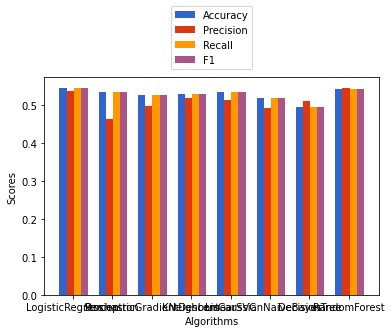

In [229]:
ind = np.arange(8)
width = 0.36

fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind*2, accuracies, width, color='#3165cc')
rects2 = ax.bar(ind*2+width, precisions, width, color='#dd3812')
rects3 = ax.bar(ind*2+width*2, recalls, width, color='#ff9900')
rects4 = ax.bar(ind*2+width*3, recalls, width, color='#aa5588')

ax.set_ylabel('Scores')
ax.set_xlabel('Algorithms')
ax.set_xticks(ind*2+0.5)
ax.set_xticklabels(labels)
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('Accuracy', 'Precision', 'Recall', 'F1'), loc='upper center', bbox_to_anchor=(0.5,1.35))

plt.show()